In [1]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

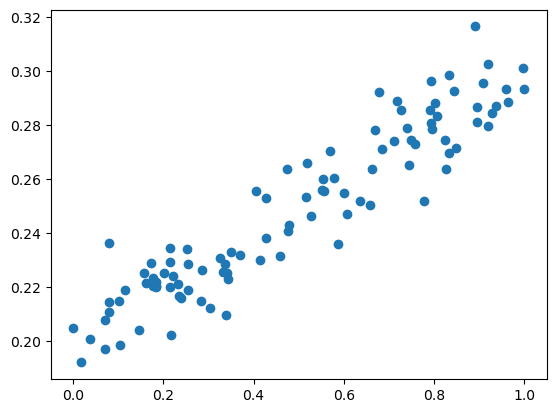

In [2]:
# 生成虚拟数据
x_data = np.random.rand(100)
noise = np.random.normal(0, 0.01, 100)
y_data = x_data*0.1+ 0.2 + noise
plt.scatter(x_data, y_data)

plt.show()

In [3]:
# 转换格式，变为（100,1）的二维数组，-1表示未知
x_data=x_data.reshape(-1,1)
x_data = torch.FloatTensor(x_data)

y_data = y_data.reshape(-1,1)
y_data = torch.FloatTensor(y_data)

print(y_data.shape)
print(x_data.shape)
# 再转化为变量
inputs = Variable(x_data)
targets = Variable(y_data)
print(inputs.shape)
print(targets.shape)

torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])
torch.Size([100, 1])


In [4]:
# 构建神经网络模型，套路相同

class LinearRegression(nn.Module):
    # 初始化，定义网络结构
    def __init__(self):
        # 初始化nnModule
        super(LinearRegression, self).__init__()
        # 定义了一个全连接层，参数为输入值和输出值个数
        self.fc = nn.Linear(1, 1)
        
    # 前向计算，定义网络计算
    def forward(self, x):
        outs =self.fc(x) # 传入给全连接层进行计算并返回out
        return outs
        

In [5]:
# 实例化模型
model = LinearRegression()

# 定义损失函数，均方差函数
mse_loss = nn.MSELoss()

# 定义优化器，使用随机梯度下降法，传入模型的参数，（学习率）步长0.1
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [6]:
# 展示参数，weight权值，bias偏置值。自行选择是否查看
for name,parameters in model.named_parameters():
    print('name: {},param:{}'.format(name,parameters))

name: fc.weight,param:Parameter containing:
tensor([[0.1084]], requires_grad=True)
name: fc.bias,param:Parameter containing:
tensor([-0.1639], requires_grad=True)


In [7]:
for i in range(1001):
    # 把inputs传给模型，out也就是模型的预测值
    out = model(inputs)
    # 计算损失
    loss = mse_loss(out, targets)
    # 把优化器的梯度清零，否则下一次会累加梯度
    optimizer.zero_grad()
    # 把loss丢进优化器，优化loss，计算梯度，希望梯度尽可能小
    loss.backward()
    # 修改权值
    optimizer.step()
    if i % 200 == 0:
        # 每200次打印损失的值
        print(i, loss.item())

0 0.12918463349342346
200 0.00012363132555037737
400 0.00011395225010346621
600 0.00011390807048883289
800 0.00011390785948606208
1000 0.00011390784493414685


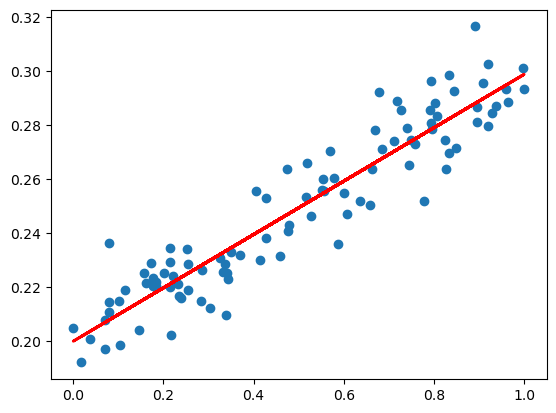

In [8]:
# 此时传入inputs，模型的参数是最后一次使用优化器后的参数。返回预测值
y_pred = model(inputs)
plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred.data.numpy(), color='red',lw = 2)

In [9]:
for name,parameters in model.named_parameters():
    print('name: {},param:{}'.format(name,parameters))

name: fc.weight,param:Parameter containing:
tensor([[0.0989]], requires_grad=True)
name: fc.bias,param:Parameter containing:
tensor([0.2000], requires_grad=True)
